![Quora-1.png](attachment:Quora-1.png)

<h1 style="text-align:center;font-size:30px;" > Quora Question Pairs </h1>

<h1> 1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p>Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.</p>
<p>
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
</p>
<br>
> Credits: Kaggle 


__ Problem Statement __
- Identify which questions asked on Quora are duplicates of questions that have already been asked. 
- This could be useful to instantly provide answers to questions that have already been answered. 
- We are tasked with predicting whether a pair of questions are duplicates or not. 

<h2> 1.2 Sources/Useful Links</h2>

- Source : https://www.kaggle.com/c/quora-question-pairs
<br><br>____ Useful Links ____
- Discussions : https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/comments
- Kaggle Winning Solution and other approaches: https://www.dropbox.com/sh/93968nfnrzh8bp5/AACZdtsApc1QSTQc7X0H3QZ5a?dl=0
- Blog 1 : https://engineering.quora.com/Semantic-Question-Matching-with-Deep-Learning
- Blog 2 : https://towardsdatascience.com/identifying-duplicate-questions-on-quora-top-12-on-kaggle-4c1cf93f1c30

<h2>1.3 Real world/Business Objectives and Constraints </h2>

1. The cost of a mis-classification can be very high.
2. You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
3. No strict latency concerns.
4. Interpretability is partially important.

<h1>2. Machine Learning Probelm </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<p> 
- Data will be in a file Train.csv <br>
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate <br>
- Size of Train.csv - 60MB <br>
- Number of rows in Train.csv = 404,290
</p>

<h3> 2.1.2 Example Data point </h3>

<pre>
"id","qid1","qid2","question1","question2","is_duplicate"
"0","1","2","What is the step by step guide to invest in share market in india?","What is the step by step guide to invest in share market?","0"
"1","3","4","What is the story of Kohinoor (Koh-i-Noor) Diamond?","What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?","0"
"7","15","16","How can I be a good geologist?","What should I do to be a great geologist?","1"
"11","23","24","How do I read and find my YouTube comments?","How can I see all my Youtube comments?","1"
</pre>

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

<p> It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not. </p>

<h3> 2.2.2 Performance Metric </h3>

Source: https://www.kaggle.com/c/quora-question-pairs#evaluation

Metric(s): 
* log-loss : https://www.kaggle.com/wiki/LogarithmicLoss
* Binary Confusion Matrix

<h2> 2.3 Train and Test Construction </h2>

<p>  </p>
<p> We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with. </p>

<h1>1. Exploratory Data Analysis </h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup\

print('done')

done


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h2> a. Reading data and basic stats </h2>

In [3]:
df = pd.read_csv("C:/Users/HARRY/Desktop/ML/Applied ai/Case_studies/Quora question pair/train.csv")
print("Number of data points:",df.shape)


Number of data points: (404290, 6)


In [4]:
df=df.sample(n=50000)
print(df.head(5))
print(df.shape)

            id    qid1    qid2  \
370564  370564  501131  501132   
106105  106105    1286   13756   
219868  219868  326847  326848   
245336  245336  358163  358164   
135452  135452  102817   66488   

                                                question1  \
370564  I create e-learning content and have created v...   
106105       How can I improve my spoken English ability?   
219868             How can I be an expert in mathematics?   
245336  Do AI173 flight is operating its every flight ...   
135452  What are the safety precautions on handling sh...   

                                                question2  is_duplicate  
370564  Not able to send GIF in new update of WhatsApp...             0  
106105          How can I improve English speaking skill?             1  
219868  How can an individual become an expert in math...             1  
245336  I met with an accident and broke 6 of my teeth...             0  
135452  What are the safety precautions on handling sh... 

In [5]:
df.info() # question 1 and question 2 we have null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 370564 to 126900
Data columns (total 6 columns):
id              50000 non-null int64
qid1            50000 non-null int64
qid2            50000 non-null int64
question1       50000 non-null object
question2       49999 non-null object
is_duplicate    50000 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.7+ MB


We are given a minimal number of data fields here, consisting of:

- id:  Looks like a simple rowID
- qid{1, 2}:  The unique ID of each question in the pair
- question{1, 2}:  The actual textual contents of the questions.
- is_duplicate:  The label that we are trying to predict - whether the two questions are duplicates of each other.

<h3> b. Distribution of data points among output classes</h3>
- Number of duplicate(smilar) and non-duplicate(non similar) questions

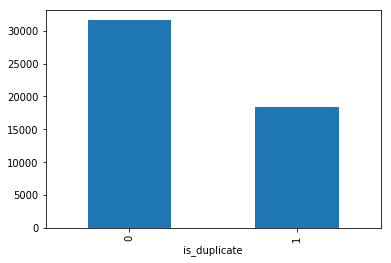

In [203]:
df.groupby("is_duplicate")['id'].count().plot.bar()# same as the sql groupby

In [204]:
print('~> Total number of question pairs for training:\n   {}'.format(len(df)))

~> Total number of question pairs for training:
   50000


In [205]:
print('~> Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

~> Question pairs are not Similar (is_duplicate = 0):
   63.16%

~> Question pairs are Similar (is_duplicate = 1):
   36.84%


<h3> c. Number of unique questions </h3>

In [206]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 88985

Number of unique questions that appear more than one time: 7437 (8.357588357588359%)

Max number of times a single question is repeated: 19



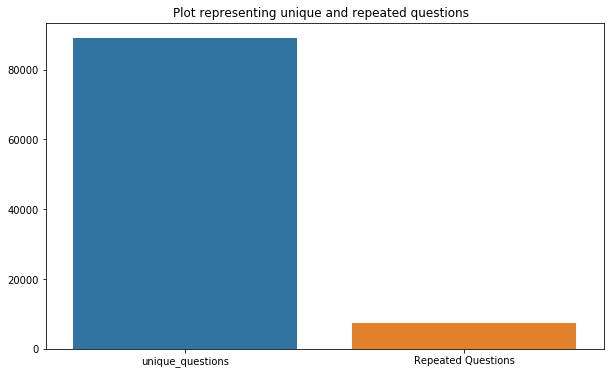

In [207]:

x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(10, 6))

plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

<h3>d. Checking for Duplicates </h3>

In [208]:
#checking whether there are any repeated pair of questions

pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate questions",(pair_duplicates).shape[0] - df.shape[0])# if their will be a question that repreated then one row'll be less because we are using
# group by thats why,   we are just substracting the shapee

Number of duplicate questions 0


<h3> e. Number of occurrences of each question </h3>

Maximum number of times a single question is repeated: 19



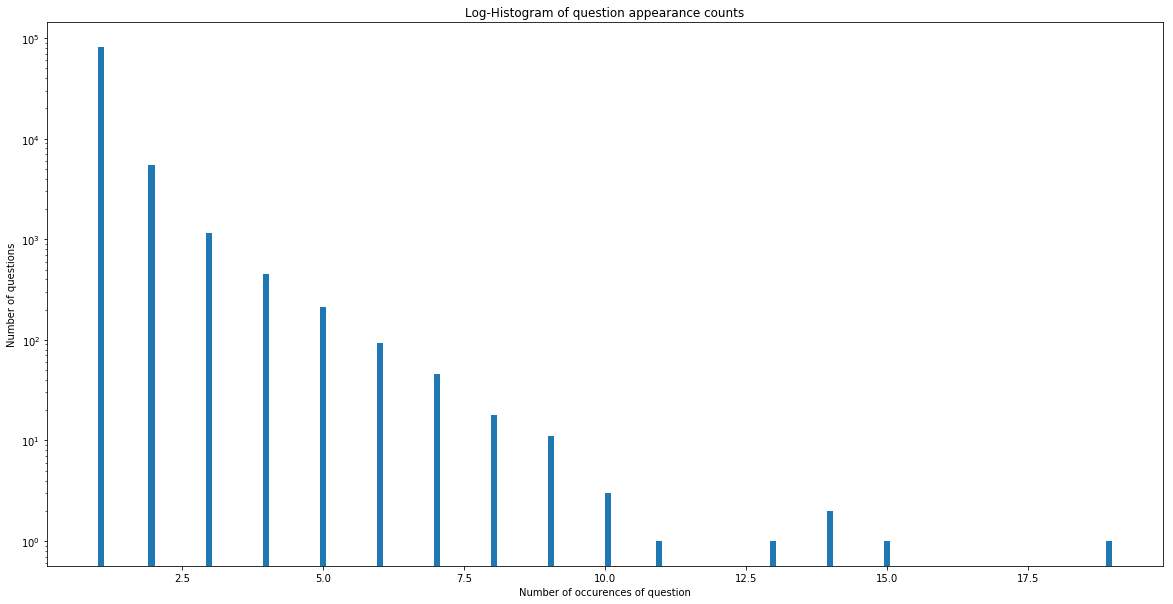

In [209]:
plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

<h3> f. Checking for NULL values </h3>

In [6]:
#Checking whether there are any rows with null values
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

            id    qid1    qid2                       question1 question2  \
105780  105780  174363  174364  How can I develop android app?       NaN   

        is_duplicate  
105780             0  


- There are two rows with null values in question2 

In [7]:
# Filling the null values with ' '
df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


# 2. Basic Feature Extraction (before cleaning)

Let us now construct a few features like:
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)

In [8]:

df['q1len'] = df['question1'].str.len() 
df['q2len'] = df['question2'].str.len()

df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

def normalized_word_Common(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2) #  & means in both
df['word_Common'] = df.apply(normalized_word_Common, axis=1)


def normalized_word_Total(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * (len(w1) + len(w2))
df['word_Total'] = df.apply(normalized_word_Total, axis=1)


def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
df['word_share'] = df.apply(normalized_word_share, axis=1)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share
370564,370564,501131,501132,I create e-learning content and have created v...,Not able to send GIF in new update of WhatsApp...,0,143,61,25,12,1.0,35.0,0.028571
106105,106105,1286,13756,How can I improve my spoken English ability?,How can I improve English speaking skill?,1,44,41,8,7,5.0,15.0,0.333333
219868,219868,326847,326848,How can I be an expert in mathematics?,How can an individual become an expert in math...,1,38,54,8,9,6.0,16.0,0.375000
245336,245336,358163,358164,Do AI173 flight is operating its every flight ...,I met with an accident and broke 6 of my teeth...,0,66,67,12,15,1.0,25.0,0.040000
135452,135452,102817,66488,What are the safety precautions on handling sh...,What are the safety precautions on handling sh...,1,91,84,15,14,12.0,27.0,0.444444


<h3> 2.0.1 Analysis of some of the extracted features </h3>

- Here are some questions have only one single words.

In [9]:
print ("Minimum length of the questions in question1 : " , min(df['q1_n_words']))

print ("Minimum length of the questions in question2 : " , min(df['q2_n_words']))

print ("Number of Questions with minimum length [question1] :", df[df['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", df[df['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 6
Number of Questions with minimum length [question2] : 3


<h4> 2.0.2 Feature: word_share </h4>

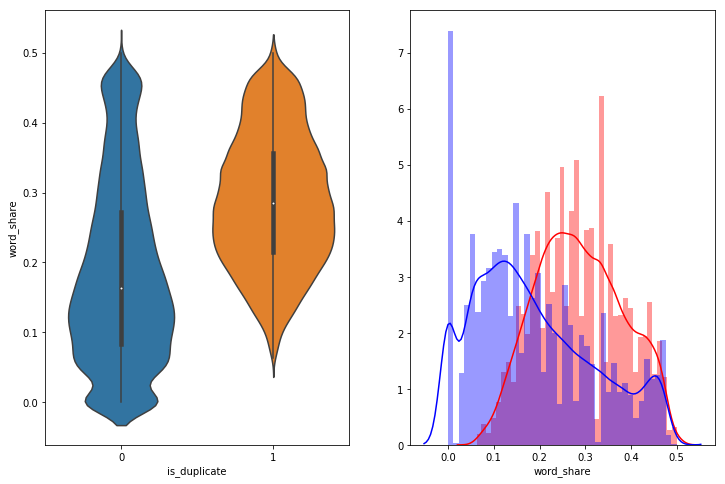

In [461]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df)

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][:] , label = "0" , color = 'blue' )
plt.show()

- The distributions for normalized word_share have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high word similarity
- The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)
- In the feature engineering the best feature for seprating the datapoints is ->  When the pdf's of the 2 lables ( 0 or 1 )  is seprated, The worst case means when the pdf's are totaly overlapping means one top of other,  so in this plot pdf's are overlapping but not properly, so this feature is good feature.

<h4> 2.0.3 Feature: word_Common </h4>

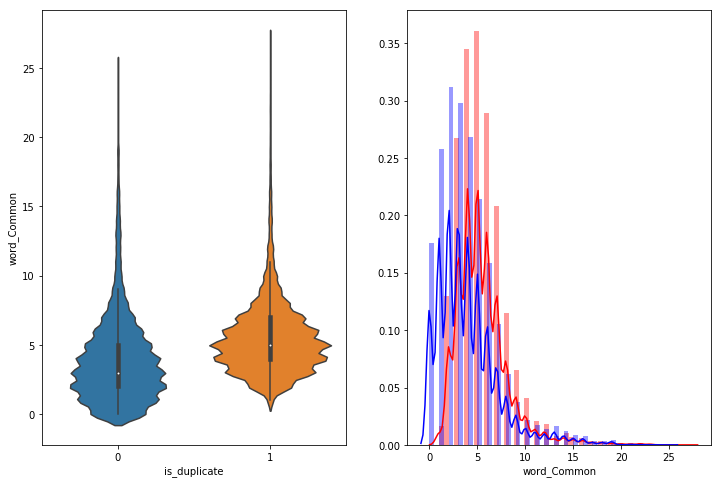

In [215]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'blue' )
plt.show()

<p> The distributions of the word_Common feature in similar and non-similar questions are highly overlapping </p>

# 3.                         Text Preprocessing

In [10]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

<h2>  Preprocessing of Text </h2>

- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

In [11]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 
import nltk
nltk.download('stopwords')
 
STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)# + means similar words in left one or more like 13000000              [0-9] means any one word... Use + bcz words can be more
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(""):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(""):
        x = porter.stem(x)# it is used for the stemming (like plying,plays -> play)
        example1 = BeautifulSoup(x)# used to extracting the sentences from the html may be our sentence contoians some html tage, get_text gives us only text
        x = example1.get_text()
               
    
    return x
    


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HARRY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 4. Advanced Feature Extraction (NLP and Fuzzy Features) 

Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ :  Check if First word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
        
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>


- __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

- __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>





- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [12]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    
    # Get the non-stopwords in Questions          WORDS
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions                    STOPWORDS
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    
    
    #         *******************************INTERSECTION***************************************************
    
    
    # Get the common non-stopwords from Question pair       
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features



# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)


In [13]:


def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)# 
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    
    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [14]:
df = extract_features(df)
df.head(2)

token features...
fuzzy features..


,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_n_words,q2_n_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
370564,370564,501131,501132,i create e learning content and have created v...,not able to send gif in new update of whatsapp...,0,143,61,25,12,...,0.035714,0.0,0.0,16.0,20.0,22,21,29,34,0.096774
106105,106105,1286,13756,how can i improve my spoken english ability,how can i improve english speaking skill,1,44,41,8,7,...,0.624992,0.0,1.0,1.0,7.5,80,75,70,71,0.428571


<h3>Some new features </h3>

In [221]:
# For visulusatoin refer this.
#https://www.kaggle.co
#m/sudalairajkumar/simple-leaky-exploration-notebook-quora
#https://www.kaggle.com/jturkewitz/magic-features-0-03-gain

In [222]:
#***********************************Not understood this feature (so complex)**************************************


# df1 = df[['question1']].copy()
# df2 = df[['question2']].copy()
# df2.rename(columns = {'question2':'question1'},inplace=True)        # reanaming questoins2 feature to the questoin1
# train_questions = df1.append(df2)
# train_questions.drop_duplicates(subset = ['question1'],inplace=True)# drop all the duplicates means
# #******************************* Now we have totaly unique questions in one column (questoin1)**************************************
# train_questions.reset_index(inplace=True,drop=True)

# questions_dict = pd.Series(train_questions.index.values,index=train_questions.question1.values).to_dict()
# train_cp = df.copy()
# train_cp.drop(['qid1','qid2'],axis=1,inplace=True)

# #*****************************
# train_cp['q1_hash'] = train_cp['question1'].map(questions_dict)
# train_cp['q2_hash'] = train_cp['question2'].map(questions_dict)


# q1_vc = train_cp.q1_hash.value_counts().to_dict()
# q2_vc = train_cp.q2_hash.value_counts().to_dict()






# def try_apply_dict(x,dict_to_apply):
#     try:
#         return dict_to_apply[x]
#     except KeyError:
#         return 0
# #map to frequency space
# train_cp['q1_freq'] = train_cp['q1_hash'].map(lambda x: try_apply_dict(x,q1_vc) + try_apply_dict(x,q2_vc))
# train_cp['q2_freq'] = train_cp['q2_hash'].map(lambda x: try_apply_dict(x,q1_vc) + try_apply_dict(x,q2_vc))

# train_cp = train_cp[train_cp['is_duplicate'] >= 0][['id','q1_hash','q2_hash','q1_freq','q2_freq','is_duplicate']]


<h3>3.5.1 Analysis of extracted features </h3>

- Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
- We can observe the most frequent occuring words

In [223]:
df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]




# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))



#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s', encoding="utf-8")
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s', encoding="utf-8")

Number of data points in class 1 (duplicate pairs) : 36840
Number of data points in class 0 (non duplicate pairs) : 63160


In [224]:
# reading the text files and removing the Stop Words:
d = path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt'), encoding="utf-8").read()
textn_w = open(path.join(d, 'train_n.txt'), encoding="utf-8").read()



stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
#stopwords.remove("best")
#stopwords.remove("!")
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))


Total number of words in duplicate pair questions : 1995178
Total number of words in non duplicate pair questions : 4120961


Word Cloud for Duplicate Question pairs


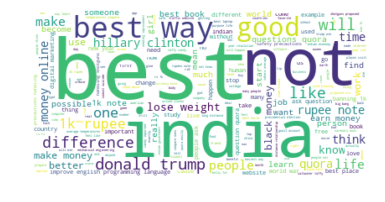

In [225]:
wc = WordCloud(background_color="white", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud for non-Duplicate Question pairs:


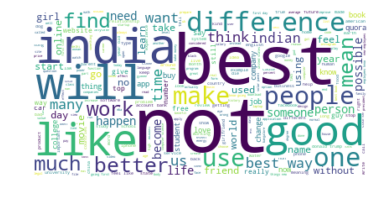

In [226]:
wc = WordCloud(background_color="white", max_words=len(textn_w),stopwords=stopwords)
# generate word cloud
wc.generate(textn_w)
print ("Word Cloud for non-Duplicate Question pairs:")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<h4> 3.5.1.2 Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'] </h4>

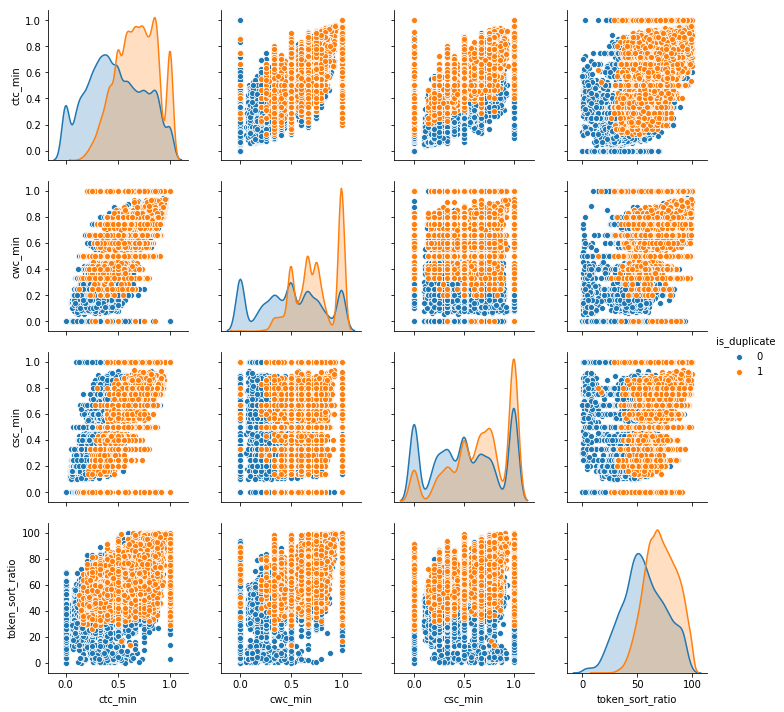

In [227]:
n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

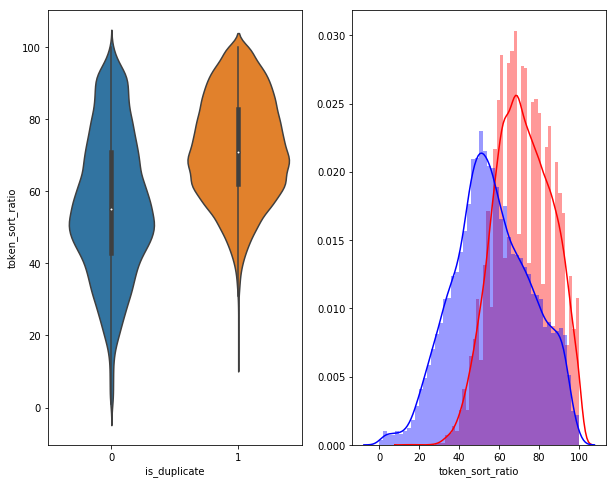

In [228]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:]
              )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

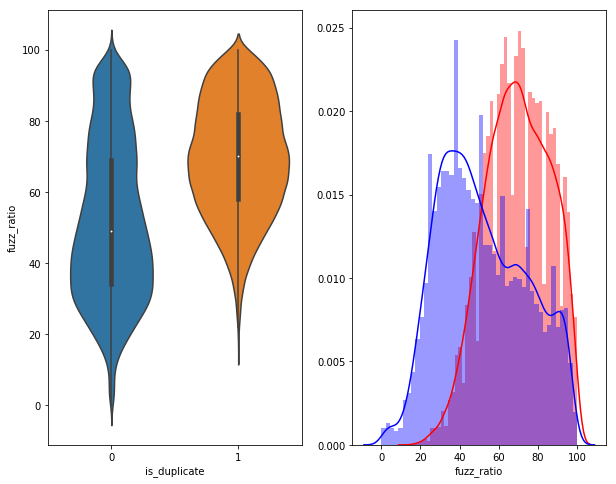

In [229]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

<h3>3.5.2 Visualization </h3>

In [230]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 2 dimention

from sklearn.preprocessing import MinMaxScaler

dfp_subsampled = df[0:2500]
X = MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = dfp_subsampled['is_duplicate'].values

In [231]:
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2500 samples in 0.011s...
[t-SNE] Computed neighbors for 2500 samples in 0.271s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2500
[t-SNE] Computed conditional probabilities for sample 2000 / 2500
[t-SNE] Computed conditional probabilities for sample 2500 / 2500
[t-SNE] Mean sigma: 0.171891
[t-SNE] Computed conditional probabilities in 0.238s
[t-SNE] Iteration 50: error = 75.1146317, gradient norm = 0.0899587 (50 iterations in 3.565s)
[t-SNE] Iteration 100: error = 64.7797394, gradient norm = 0.0277739 (50 iterations in 1.921s)
[t-SNE] Iteration 150: error = 63.0074501, gradient norm = 0.0155339 (50 iterations in 1.763s)
[t-SNE] Iteration 200: error = 62.3906212, gradient norm = 0.0156693 (50 iterations in 1.718s)
[t-SNE] Iteration 250: error = 62.0222511, gradient norm = 0.0124387 (50 iterations in 1.655s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.022251
[t-SNE] Iteration 300: erro

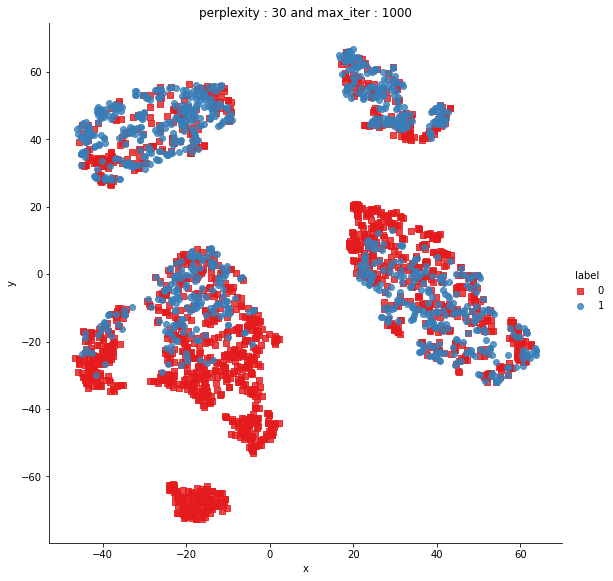

In [232]:
df2 = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df2, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

<h2> 3.6 Featurizing text data </h2>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
import spacy

<h3> Train_Test_Split </h3>

In [16]:
print(df.shape)
X_train,X_test, y_train, y_test = train_test_split(df, df['is_duplicate'], stratify=df['is_duplicate'], test_size=0.3)
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data  :",X_test.shape)

(50000, 28)
Number of data points in train data : (35000, 28)
Number of data points in test data  : (15000, 28)


In [17]:
print(y_train.value_counts())
print(y_test.value_counts())
X_train.drop(["is_duplicate"], axis = 1, inplace = True)
X_test.drop(["is_duplicate"], axis = 1, inplace = True)

0    22052
1    12948
Name: is_duplicate, dtype: int64
0    9451
1    5549
Name: is_duplicate, dtype: int64


In [18]:
X_test.head(1)

,id,qid1,qid2,question1,question2,q1len,q2len,q1_n_words,q2_n_words,word_Common,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
101120,101120,167581,167582,how do i appeal my real name to quora,how can i verify my name on quora as per the ...,38,63,9,14,5.0,...,0.428568,0.0,1.0,5.0,11.5,79,59,46,66,0.282051


<h3> Tf-idf Weighted Wordtovec  </h3>

In [21]:
X_train['question1'] = X_train['question1'].apply(lambda x: str(x))
X_train['question2'] = X_train['question2'].apply(lambda x: str(x))

X_test['question1'] = X_test['question1'].apply(lambda x: str(x))
X_test['question2'] = X_test['question2'].apply(lambda x: str(x))

In [22]:
train_questions = list(X_train['question1']) + list(X_train['question2'])

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(train_questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [29]:
# # delete the questions which has the zero length

# d=X_train[X_train['question1']=='']
# X_train=X_train.drop(d.index,axis=0)
# y_train=y_train.drop(d.index,axis=0)
# print(X_train.shape)
# print(y_train.shape)


# d=X_train[X_train['question2']=='']
# X_train=X_train.drop(d.index,axis=0)
# y_train=y_train.drop(d.index,axis=0)
# print(X_train.shape)
# print(y_train.shape)


# d=X_test[X_test['question1']=='']
# X_test=X_test.drop(d.index,axis=0)
# y_test=y_test.drop(d.index,axis=0)
# print(X_test.shape)
# print(y_test.shape)

d=X_test[X_test['question2']=='']
X_test=X_test.drop(d.index,axis=0)
y_test=y_test.drop(d.index,axis=0)
print(X_test.shape)
print(y_test.shape)





(14998, 27)
(14998,)


<h2> For train tfidf_questions </h2>

In [ ]:
nlp = spacy.load('en_core_web_sm')
train_q1_tdf = []
for qu2 in tqdm(list(X_train['question1'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    train_q1_tdf.append(mean_vec2)


In [ ]:
train_q2_tdf = []
for qu2 in tqdm(list(X_train['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    train_q2_tdf.append(mean_vec2)


<h2> For test tfidf_questions </h2>

In [ ]:
test_q1_tdf = []
for qu2 in tqdm(list(X_test['question1'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    test_q1_tdf.append(mean_vec2)


In [ ]:
test_q2_tdf = []
for qu2 in tqdm(list(X_test['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    test_q2_tdf.append(mean_vec2)


<h2> tf_idf vectorizer for train </h2>

In [32]:
#*************************************************************For question1***************************************************************

from sklearn.feature_extraction.text import TfidfVectorizer # We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1, 2))
vectorizer.fit(train_questions)# that is learned from trainned  data
# we use the fitted CountVectorizer to convert the text to vector 
X_train_tf_q1= vectorizer.transform(X_train['question1'].values.tolist()) 
X_test_tf_q1 = vectorizer.transform(X_test['question1'].values.tolist())
print("After vectorizations")

print(X_train_tf_q1.shape, y_train.shape)
print(X_test_tf_q1.shape, y_test.shape)
print("="*100) # so the dimension of alll are the same by using first fit and then transform




#*************************************************************For question2***************************************************************

from sklearn.feature_extraction.text import TfidfVectorizer # We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1, 2))
vectorizer.fit(train_questions)# that is learned from trainned  data
# we use the fitted CountVectorizer to convert the text to vector 
X_train_tf_q2= vectorizer.transform(X_train['question2']) 
X_test_tf_q2 = vectorizer.transform(X_test['question2'])
print("After vectorizations")

print(X_train_tf_q2.shape, y_train.shape)
print(X_test_tf_q2.shape, y_test.shape)
print("="*100) # so the dimension of alll are the same by using first fit and then transform




After vectorizations
(35000, 5000) (35000,)
(14998, 5000) (14998,)
After vectorizations
(35000, 5000) (35000,)
(14998, 5000) (14998,)


In [36]:
X_train.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'q1len', 'q2len',
       'q1_n_words', 'q2_n_words', 'word_Common', 'word_Total', 'word_share',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

<h1>  Standadized Features </h1>

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [39]:
price_scalar = MinMaxScaler() 
price_scalar.fit(X_train['q1len'].values.reshape(-1,1))
# finding the mean and standard deviation of this data #print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance. t
q1len = price_scalar.transform(X_train['q1len'].values.reshape(-1, 1))
q1len # Now standardize the data with above maen and variance. 
q1len_test = price_scalar.transform(X_test['q1len'].values.reshape(-1, 1)) 
q1len_test
# Now standardize the data with above maen and variance. cv_price_standar =

array([[0.09850746],
       [0.10447761],
       [0.1761194 ],
       ...,
       [0.05970149],
       [0.09552239],
       [0.10149254]])

In [40]:
price_scalar.fit(X_train['q2len'].values.reshape(-1,1))
# finding the mean and standard deviation of this data #print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance. t
q2len = price_scalar.transform(X_train['q2len'].values.reshape(-1, 1))
q2len # Now standardize the data with above maen and variance. 
q2len_test = price_scalar.transform(X_test['q2len'].values.reshape(-1, 1)) 
q2len_test

array([[0.04982818],
       [0.03350515],
       [0.03178694],
       ...,
       [0.02920962],
       [0.02920962],
       [0.03780069]])

In [41]:
price_scalar.fit(X_train['q2_n_words'].values.reshape(-1,1))
# finding the mean and standard deviation of this data #print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance. t
q2_n_words = price_scalar.transform(X_train['q2_n_words'].values.reshape(-1, 1))
q2_n_words # Now standardize the data with above maen and variance. 
q2_n_words_test = price_scalar.transform(X_test['q2_n_words'].values.reshape(-1, 1)) 
q2_n_words_test

array([[0.05508475],
       [0.03389831],
       [0.02966102],
       ...,
       [0.02966102],
       [0.03389831],
       [0.04661017]])

In [42]:
price_scalar.fit(X_train['word_Common'].values.reshape(-1,1))
# finding the mean and standard deviation of this data #print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance. t
word_Common = price_scalar.transform(X_train['word_Common'].values.reshape(-1, 1))
word_Common # Now standardize the data with above maen and variance. 
word_Common_test = price_scalar.transform(X_test['word_Common'].values.reshape(-1, 1)) 
word_Common_test

array([[0.18518519],
       [0.14814815],
       [0.07407407],
       ...,
       [0.07407407],
       [0.25925926],
       [0.22222222]])

In [43]:
price_scalar.fit(X_train['word_Total'].values.reshape(-1,1))
# finding the mean and standard deviation of this data #print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance. t
word_Total = price_scalar.transform(X_train['word_Total'].values.reshape(-1, 1))
word_Total # Now standardize the data with above maen and variance. 
word_Total_test = price_scalar.transform(X_test['word_Total'].values.reshape(-1, 1)) 
word_Total_test


array([[0.11801242],
       [0.08074534],
       [0.10559006],
       ...,
       [0.0621118 ],
       [0.08695652],
       [0.11180124]])

In [44]:
price_scalar.fit(X_train['word_share'].values.reshape(-1,1))
# finding the mean and standard deviation of this data #print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance. t
word_share = price_scalar.transform(X_train['word_share'].values.reshape(-1, 1))
word_share # Now standardize the data with above maen and variance. 
word_share_test= price_scalar.transform(X_test['word_share'].values.reshape(-1, 1)) 
word_share_test

array([[0.45454545],
       [0.5       ],
       [0.2       ],
       ...,
       [0.30769231],
       [0.82352941],
       [0.57142857]])

In [45]:
price_scalar.fit(X_train['cwc_min'].values.reshape(-1,1))
# finding the mean and standard deviation of this data #print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance. t
cwc_min = price_scalar.transform(X_train['cwc_min'].values.reshape(-1, 1))
cwc_min # Now standardize the data with above maen and variance. 
cwc_min_test= price_scalar.transform(X_test['cwc_min'].values.reshape(-1, 1)) 
cwc_min_test

array([[0.74998594],
       [0.799989  ],
       [0.24999531],
       ...,
       [0.66664861],
       [0.99998125],
       [0.59999175]])

In [46]:
price_scalar.fit(X_train['cwc_max'].values.reshape(-1,1))
# finding the mean and standard deviation of this data #print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance. t
cwc_max = price_scalar.transform(X_train['cwc_max'].values.reshape(-1, 1))
cwc_max # Now standardize the data with above maen and variance. 
cwc_max_test= price_scalar.transform(X_test['cwc_max'].values.reshape(-1, 1)) 
cwc_max_test

array([[0.49999479],
       [0.66665972],
       [0.14285599],
       ...,
       [0.49999063],
       [0.799989  ],
       [0.42856798]])

In [47]:
price_scalar.fit(X_train['csc_min'].values.reshape(-1,1))
# finding the mean and standard deviation of this data #print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance. t
csc_min = price_scalar.transform(X_train['csc_min'].values.reshape(-1, 1))
csc_min # Now standardize the data with above maen and variance. 
csc_min_test = price_scalar.transform(X_test['csc_min'].values.reshape(-1, 1)) 
csc_min_test

array([[0.59999229],
       [0.        ],
       [0.24999554],
       ...,
       [0.        ],
       [0.74998661],
       [0.74998661]])

In [48]:
price_scalar.fit(X_train['csc_max'].values.reshape(-1,1))
# finding the mean and standard deviation of this data #print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance. t
csc_max = price_scalar.transform(X_train['csc_max'].values.reshape(-1, 1))
csc_max # Now standardize the data with above maen and variance. 
csc_max_test= price_scalar.transform(X_test['csc_max'].values.reshape(-1, 1)) 
csc_max_test

array([[0.42856837],
       [0.        ],
       [0.19999743],
       ...,
       [0.        ],
       [0.74998661],
       [0.59999229]])

In [50]:
price_scalar.fit(X_train['ctc_min'].values.reshape(-1,1))
# finding the mean and standard deviation of this data #print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance. t
ctc_min = price_scalar.transform(X_train['ctc_min'].values.reshape(-1, 1))
ctc_min # Now standardize the data with above maen and variance. 
ctc_min_test = price_scalar.transform(X_test['ctc_min'].values.reshape(-1, 1)) 
ctc_min_test

array([[0.66666243],
       [0.57142313],
       [0.24999807],
       ...,
       [0.3999939 ],
       [0.87499323],
       [0.66666243]])

In [51]:
price_scalar.fit(X_train['ctc_max'].values.reshape(-1,1))
# finding the mean and standard deviation of this data #print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance. t
ctc_max = price_scalar.transform(X_train['ctc_max'].values.reshape(-1, 1))
ctc_max # Now standardize the data with above maen and variance. 
ctc_max_test = price_scalar.transform(X_test['ctc_max'].values.reshape(-1, 1)) 
ctc_max_test

array([[0.42857105],
       [0.44444228],
       [0.16666632],
       ...,
       [0.24999844],
       [0.777774  ],
       [0.49999896]])

In [52]:
price_scalar.fit(X_train['last_word_eq'].values.reshape(-1,1))
# finding the mean and standard deviation of this data #print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance. t
last_word_eq = price_scalar.transform(X_train['last_word_eq'].values.reshape(-1, 1))
last_word_eq # Now standardize the data with above maen and variance. 
last_word_eq_test = price_scalar.transform(X_test['last_word_eq'].values.reshape(-1, 1)) 
last_word_eq_test

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

In [53]:
price_scalar.fit(X_train['first_word_eq'].values.reshape(-1,1))
# finding the mean and standard deviation of this data #print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance. t
first_word_eq = price_scalar.transform(X_train['first_word_eq'].values.reshape(-1, 1))
first_word_eq # Now standardize the data with above maen and variance. 
first_word_eq_test = price_scalar.transform(X_test['first_word_eq'].values.reshape(-1, 1)) 
first_word_eq_test

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]])

In [54]:
price_scalar.fit(X_train['abs_len_diff'].values.reshape(-1,1))
# finding the mean and standard deviation of this data #print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance. t
abs_len_diff = price_scalar.transform(X_train['abs_len_diff'].values.reshape(-1, 1))
abs_len_diff # Now standardize the data with above maen and variance. 
abs_len_diff_test = price_scalar.transform(X_test['abs_len_diff'].values.reshape(-1, 1)) 
abs_len_diff_test

array([[0.02304147],
       [0.00921659],
       [0.01843318],
       ...,
       [0.01382488],
       [0.00460829],
       [0.01382488]])

In [55]:
price_scalar.fit(X_train['mean_len'].values.reshape(-1,1))
# finding the mean and standard deviation of this data #print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance. t
mean_len = price_scalar.transform(X_train['mean_len'].values.reshape(-1, 1))
mean_len # Now standardize the data with above maen and variance. 
mean_len_test = price_scalar.transform(X_test['mean_len'].values.reshape(-1, 1)) 
mean_len_test

array([[0.07581227],
       [0.05054152],
       [0.06498195],
       ...,
       [0.03971119],
       [0.05415162],
       [0.06859206]])

In [56]:
price_scalar.fit(X_train['token_set_ratio'].values.reshape(-1,1))
# finding the mean and standard deviation of this data #print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance. t
token_set_ratio = price_scalar.transform(X_train['token_set_ratio'].values.reshape(-1, 1))
token_set_ratio # Now standardize the data with above maen and variance. 
token_set_ratio_test = price_scalar.transform(X_test['token_set_ratio'].values.reshape(-1, 1)) 
token_set_ratio_test

array([[0.77894737],
       [0.68421053],
       [0.55789474],
       ...,
       [0.65263158],
       [0.92631579],
       [0.71578947]])

In [57]:
price_scalar.fit(X_train['token_sort_ratio'].values.reshape(-1,1))
# finding the mean and standard deviation of this data #print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance. t
token_sort_ratio = price_scalar.transform(X_train['token_sort_ratio'].values.reshape(-1, 1))
token_sort_ratio # Now standardize the data with above maen and variance. 
token_sort_ratio_test = price_scalar.transform(X_test['token_sort_ratio'].values.reshape(-1, 1)) 
token_sort_ratio_test

array([[0.59],
       [0.61],
       [0.58],
       ...,
       [0.45],
       [0.84],
       [0.6 ]])

In [58]:
price_scalar.fit(X_train['fuzz_ratio'].values.reshape(-1,1))
# finding the mean and standard deviation of this data #print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance. t
fuzz_ratio = price_scalar.transform(X_train['fuzz_ratio'].values.reshape(-1, 1))
fuzz_ratio # Now standardize the data with above maen and variance. 
fuzz_ratio_test = price_scalar.transform(X_test['fuzz_ratio'].values.reshape(-1, 1)) 
fuzz_ratio_test

array([[0.46],
       [0.63],
       [0.52],
       ...,
       [0.58],
       [0.89],
       [0.63]])

In [59]:
price_scalar.fit(X_train['fuzz_partial_ratio'].values.reshape(-1,1))
# finding the mean and standard deviation of this data #print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance. t
fuzz_partial_ratio = price_scalar.transform(X_train['fuzz_partial_ratio'].values.reshape(-1, 1))
fuzz_partial_ratio # Now standardize the data with above maen and variance. 
fuzz_partial_ratio_test = price_scalar.transform(X_test['fuzz_partial_ratio'].values.reshape(-1, 1)) 
fuzz_partial_ratio_test

array([[0.62637363],
       [0.65934066],
       [0.52747253],
       ...,
       [0.69230769],
       [0.84615385],
       [0.51648352]])

In [60]:
price_scalar.fit(X_train['longest_substr_ratio'].values.reshape(-1,1))
# finding the mean and standard deviation of this data #print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")
# Now standardize the data with above maen and variance. t
longest_substr_ratio = price_scalar.transform(X_train['longest_substr_ratio'].values.reshape(-1, 1))
longest_substr_ratio # Now standardize the data with above maen and variance. 
longest_substr_ratio_test = price_scalar.transform(X_test['longest_substr_ratio'].values.reshape(-1, 1)) 
longest_substr_ratio_test

array([[0.26620538],
       [0.30234742],
       [0.40712631],
       ...,
       [0.53081672],
       [0.43681006],
       [0.23312897]])

<h2> Merge Features</h2>

In [213]:
# q1_len=  X_train['q1len'].values.reshape(-1,1)
# q2_len=  X_train['q2len'].values.reshape(-1,1)
# q2_n_words=  X_train['q2_n_words'].values.reshape(-1,1)
# word_Common=  X_train['word_Common'].values.reshape(-1,1)
# word_Total=  X_train['word_Total'].values.reshape(-1,1)
# word_share=  X_train['word_share'].values.reshape(-1,1)
# cwc_min=  X_train['cwc_min'].values.reshape(-1,1)
# cwc_max=  X_train['cwc_max'].values.reshape(-1,1)
# csc_min=  X_train['csc_min'].values.reshape(-1,1)
# csc_max=  X_train['csc_max'].values.reshape(-1,1)
# ctc_min=  X_train['ctc_min'].values.reshape(-1,1)
# ctc_max=  X_train['ctc_max'].values.reshape(-1,1)
# last_word_eq=  X_train['last_word_eq'].values.reshape(-1,1)
# first_word_eq=  X_train['first_word_eq'].values.reshape(-1,1)
# abs_len_diff=  X_train['abs_len_diff'].values.reshape(-1,1)
# mean_len=  X_train['mean_len'].values.reshape(-1,1)
# token_set_ratio=  X_train['token_set_ratio'].values.reshape(-1,1)
# token_sort_ratio=  X_train['token_sort_ratio'].values.reshape(-1,1)
# fuzz_ratio=  X_train['fuzz_ratio'].values.reshape(-1,1)
# fuzz_partial_ratio=  X_train['fuzz_partial_ratio'].values.reshape(-1,1)
# longest_substr_ratio=  X_train['longest_substr_ratio'].values.reshape(-1,1)


In [67]:
#****************************************** tdf vectorizer ****************************************************

from scipy.sparse import hstack # with the same hstack function 
X_set1_train = hstack((X_train_tf_q1,X_train_tf_q2,q1len  ,q2len,q2_n_words,word_Common ,word_Total,   word_share, cwc_min,cwc_max,   csc_min,   csc_max   ,   ctc_min,  ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio))  
print(X_set1_train.shape,y_train.shape)

(35000, 10021) (35000,)


In [68]:
#****************************************** tdf  weighted wordtovec ****************************************************

from scipy.sparse import hstack # with the same hstack function 
X_set2_train = np.hstack((train_q1_tdf,train_q2_tdf,q1len  ,q2len,q2_n_words,word_Common ,word_Total,   word_share, cwc_min,cwc_max,   csc_min,   csc_max   ,   ctc_min,  ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio))  
print(X_set2_train.shape,y_train.shape)

(35000, 213) (35000,)


In [218]:
# q1_len=  X_test['q1len'].values.reshape(-1,1)
# q2_len=  X_test['q2len'].values.reshape(-1,1)
# q2_n_words=  X_test['q2_n_words'].values.reshape(-1,1)
# word_Common=  X_test['word_Common'].values.reshape(-1,1)
# word_Total=  X_test['word_Total'].values.reshape(-1,1)
# word_share=  X_test['word_share'].values.reshape(-1,1)
# cwc_min=  X_test['cwc_min'].values.reshape(-1,1)
# cwc_max=  X_test['cwc_max'].values.reshape(-1,1)
# csc_min=  X_test['csc_min'].values.reshape(-1,1)
# csc_max=  X_test['csc_max'].values.reshape(-1,1)
# ctc_min=  X_test['ctc_min'].values.reshape(-1,1)
# ctc_max=  X_test['ctc_max'].values.reshape(-1,1)
# last_word_eq=  X_test['last_word_eq'].values.reshape(-1,1)
# first_word_eq=  X_test['first_word_eq'].values.reshape(-1,1)
# abs_len_diff=  X_test['abs_len_diff'].values.reshape(-1,1)
# mean_len=  X_test['mean_len'].values.reshape(-1,1)
# token_set_ratio=  X_test['token_set_ratio'].values.reshape(-1,1)
# token_sort_ratio=  X_test['token_sort_ratio'].values.reshape(-1,1)
# fuzz_ratio=  X_test['fuzz_ratio'].values.reshape(-1,1)
# fuzz_partial_ratio=  X_test['fuzz_partial_ratio'].values.reshape(-1,1)
# longest_substr_ratio=  X_test['longest_substr_ratio'].values.reshape(-1,1)


In [70]:
#****************************************** tdf vectorizer ****************************************************

from scipy.sparse import hstack # with the same hstack function 
X_set1_test = hstack((X_test_tf_q1, X_test_tf_q2, q1len_test  ,q2len_test,q2_n_words_test,word_Common_test ,word_Total_test,   word_share_test, cwc_min_test,cwc_max_test,   csc_min_test,   csc_max_test   ,   ctc_min_test,  ctc_max_test,last_word_eq_test,first_word_eq_test,abs_len_diff_test,mean_len_test,token_set_ratio_test,token_sort_ratio_test,fuzz_ratio_test,fuzz_partial_ratio_test,longest_substr_ratio_test))  
print(X_set1_test .shape,y_test .shape)

(14998, 10021) (14998,)


In [76]:
#****************************************** tdf  weighted wordtovec ****************************************************

from scipy.sparse import hstack # with the same hstack function 
X_set2_test = np.hstack((test_q1_tdf,test_q2_tdf,q1len_test ,q2len_test,q2_n_words_test,word_Common_test ,word_Total_test,   word_share_test, cwc_min_test,cwc_max_test,   csc_min_test,   csc_max_test   ,   ctc_min_test,  ctc_max_test,last_word_eq_test,first_word_eq_test,abs_len_diff_test,mean_len_test,token_set_ratio_test,token_sort_ratio_test,fuzz_ratio_test,fuzz_partial_ratio_test,longest_substr_ratio_test))  
print(X_set2_test.shape,y_test.shape)

(14998, 213) (14998,)


In [296]:
# storing the final features to csv file
if not os.path.isfile('final_features.csv'):
    X_set1_train  = X_set1_train.merge(y_train, on='id',how='left')
    X_set1_train.to_csv('final_features.csv')

In [ ]:
# storing the final features1 to csv file
if not os.path.isfile('final_features1.csv'):
    X_set2_train.to_csv('final_features1.csv')

In [ ]:
# storing the final features2 to csv file
if not os.path.isfile('final_features2.csv'):
    X_set1_test  = X_set1_test.merge(y_test, on='id',how='left')
    X_set1_test.to_csv('final_features2.csv')

In [ ]:
# storing the final features3 to csv file
if not os.path.isfile('final_features3.csv'):
    X_set2_test  = X_set2_test.merge(y_test, on='id',how='left')
    X_set2_test.to_csv('final_features3.csv')

<h2> 4.1 Reading data from file and storing into sql table </h2>

In [ ]:
#Creating db file from csv
if not os.path.isfile('train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

In [ ]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
import sqlite3
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [ ]:
# read_db = '/content/gdrive/My Drive/Colab Notebooks/Quora/train.db'
read_db = 'train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

# import pandas as pd

# conn = sqlite3.connect(read_db)

# cursor = conn.cursor()

# cursor.execute("select name from sqlite_master where type='table'")

# df=pd.DataFrame(cursor.fetchall())

In [ ]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 50000;", conn_r)
        conn_r.commit()
        conn_r.close()

In [ ]:
# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)


# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
#
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true.values))

<h3>  Machine learning models </h3>

In [77]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8712104670881401


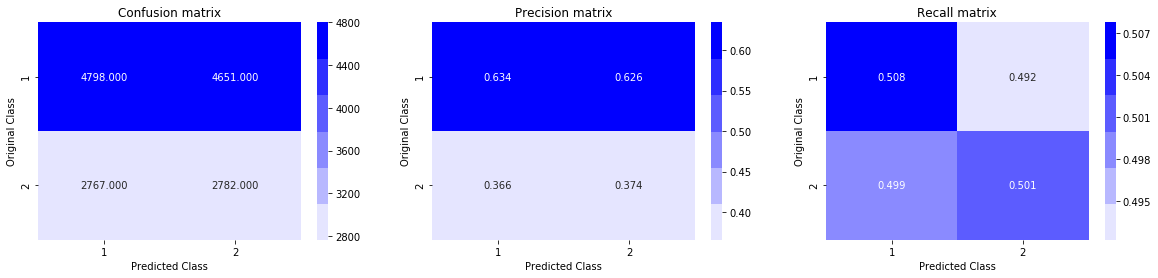

In [78]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
test_len=len(X_test)
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)#1,2 is the shape     1 row,2 columns
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])


print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))
predicted_y =np.argmax(predicted_y, axis=1)# argmax just give the index of the maximum elemet
plot_confusion_matrix(y_test, predicted_y)

<h3>Observations:</h3>

 - This is our random model or dumb model,This is the worst case of all the model predictions that we can get, so in future models, if our logloss prediction close to
    zero then it'll be  a good model.
    
 - In the precision plot, we can see From the predicted results of non_duplicate questions, we predicted 62% non_duplicate(1) and 0.37% duplicate(2).
 - In the Recall plot, we can see From the Actual results of non_duplicate questions, we predicted 50% non_duplicate(1) and 50% duplicate(2).

<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

<h5>*********************************************************Just try the simple linear models | -> Logistic Regression |*********************************</h5>

For values of alpha =  1e-05 The log loss is: 0.6468738265900219
For values of alpha =  0.0001 The log loss is: 0.6453547085373051
For values of alpha =  0.001 The log loss is: 0.6423576794077274
For values of alpha =  0.01 The log loss is: 0.6391535429761668
For values of alpha =  1 The log loss is: 0.6391939660046759
For values of alpha =  5 The log loss is: 0.6355511643331498
For values of alpha =  10 The log loss is: 0.6255763101399012


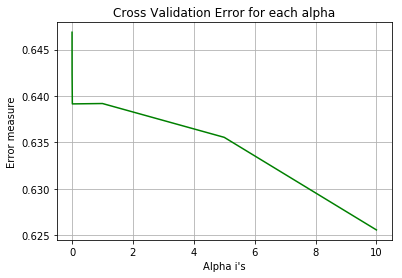

The Best Alpha  ->   10


In [109]:
X_train=X_set2_train
X_test=X_set2_test

alpha =[10**-5,10**-4, 10**-3,10**-2,1,5,10]   # hyperparameter for the sgd classifier    


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42,class_weight='balanced')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    losls=log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
    log_error_array.append(losls)
    print('For values of alpha = ', i, "The log loss is:",losls)

    
# plot 
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
# for i, txt in enumerate(np.round(log_error_array,2)):
#     ax.annotate((alpha[i],np.round(txt,2)), (alpha[i],log_error_array[i]))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.grid()
plt.show()

print('The Best Alpha  ->  ', alpha[np.argmin(log_error_array)])

For values of best alpha =  10 The train log loss is: 0.611389391754746
For values of best alpha =  10 The test log loss is: 0.6255763101399012


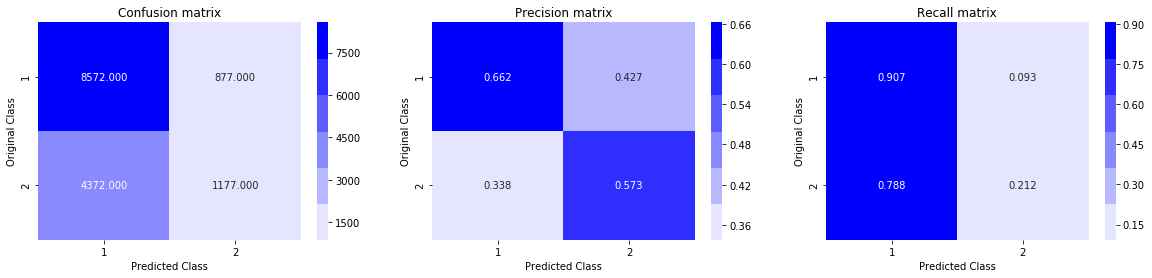

In [110]:

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42,class_weight='balanced')
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)# we have a rows of two columns
plot_confusion_matrix(y_test, predicted_y)

<h3>Observations:</h3>

 - So with the simple logistic regression model, we decreased the logloss from 0.89 to 0.56, But if we think then we get to know, why we not get close to zero       like 0.001,may be our model is so simple and yes it is just a simple linear model.
 -  In the train_data  log loss is: 0.55 and in the test_data it is 0.56 so this is not overfitting, but may be underfitting thats why loss not reduced so much.
 -  In the Confusion matrix:
     - TPR is good but TNR is so low, that means our FNR is so high, So we predicted some duplicate questions as non_duplicates, may be because our 
        non_duplicates is more as compared to duplicates.
        
 -  In the Precision matrix:
     - Precision is good for Non_duplicates questoins (1), we predicted 71% correct and for the duplicate questions (2), we predicted 58% correct .  
 -  In the Recall matrix:
     - Recall is good for Non_duplicates questoins (1), we predicted 82% correct and for the duplicate questions (2),our predictions are no so good, in the                 predictions we are just 50% sure, may be reason is Imbalanced data, non_duplicates is very large as compared to duplicates.

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

<h5>*********************************************************Just try the simple linear model | -> Linear (SVM) |*********************************</h5>

For values of alpha =  1e-05 The log loss is: 0.6419527372759594
For values of alpha =  0.0001 The log loss is: 0.6314529624689171
For values of alpha =  0.001 The log loss is: 0.6230527758123178
For values of alpha =  0.01 The log loss is: 0.6396755288651388
For values of alpha =  1 The log loss is: 0.658946454374867
For values of alpha =  5 The log loss is: 0.658946454374867
For values of alpha =  10 The log loss is: 0.6535386349230295


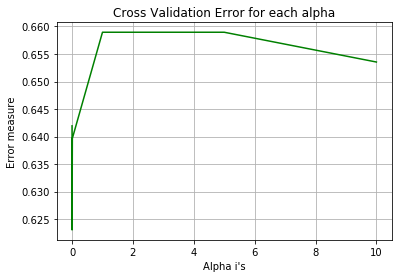

The Best Alpha  ->   0.001


In [111]:
alpha =[10**-5,10**-4, 10**-3,10**-2,1,5,10]   # hyperparameter for the sgd classifier    


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42,class_weight='balanced')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    losls=log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
    log_error_array.append(losls)
    print('For values of alpha = ', i, "The log loss is:",losls)

    
# plot 
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
# for i, txt in enumerate(np.round(log_error_array,2)):
#     ax.annotate((alpha[i],np.round(txt,2)), (alpha[i],log_error_array[i]))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.grid()
plt.show()

print('The Best Alpha  ->  ', alpha[np.argmin(log_error_array)])

For values of best alpha =  0.001 The train log loss is: 0.6135337714312198
For values of best alpha =  0.001 The test log loss is: 0.6230527758123178


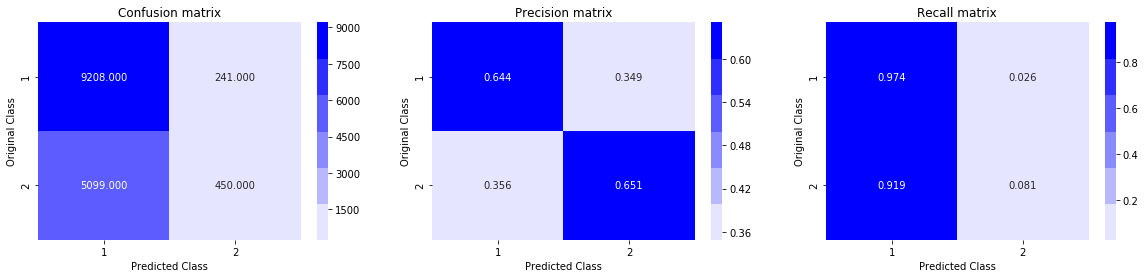

In [112]:

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42,class_weight='balanced')
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)# we have a rows of two columns
plot_confusion_matrix(y_test, predicted_y)

<h3>Observations:</h3>

 - So with the simple linear SVM model, We get  0.56 logloss. Logistic regression and the linear svm results are same.
 -  In the train_data  log loss is: 0.56 and in the test_data it is 0.56 so this is not overfitting, but may be underfitting thats why loss not reduced so much.
 -  In the Confusion matrix:
     - TPR is good but TNR is so low, that means our FNR is so high, So we predicted some duplicate questions as non_duplicates, may be because our 
        non_duplicates is more as compared to duplicates.
        
 -  In the Precision matrix:
     - Precision is good for Non_duplicates questoins (1), we predicted 69% correct and for the duplicate questions (2), we predicted 58% correct .  
 -  In the Recall matrix:
     - Recall is good for Non_duplicates questoins (1), we predicted 84% correct and for the duplicate questions (2), we get 35%.
     
 -  Now, we applied simple linear models,now we'll use some complex models like XGBoost to see logloss is decresing or not, if it'll decrease it means, our         simple linear models are  totally underfitting models. 

<h2> 4.6 XGBoost </h2>

In [277]:
import xgboost 
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4
#Now you will convert the dataset into an optimized data structure called Dmatrix that 
#XGBoost supports and gives it acclaimed performance and efficiency gains.
d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.686922	valid-logloss:0.687024
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.635264	valid-logloss:0.636181
[20]	train-logloss:0.597538	valid-logloss:0.599024
[30]	train-logloss:0.569005	valid-logloss:0.570817
[40]	train-logloss:0.547069	valid-logloss:0.549284
[50]	train-logloss:0.529951	valid-logloss:0.53243
[60]	train-logloss:0.516299	valid-logloss:0.51924
[70]	train-logloss:0.505298	valid-logloss:0.508844
[80]	train-logloss:0.49611	valid-logloss:0.500112
[90]	train-logloss:0.488356	valid-logloss:0.492777
[100]	train-logloss:0.481902	valid-logloss:0.486683
[110]	train-logloss:0.476451	valid-logloss:0.481753
[120]	train-logloss:0.471851	valid-logloss:0.477593
[130]	train-logloss:0.467994	valid-logloss:0.474083
[140]	train-logloss:0.464628	valid-logloss:0.471126
[150]	train-logloss:0.461541	valid-logloss:0.468435
[160]	train-logloss:0.458729	va

Total number of data points : 14999
[0 0 0 ... 0 1 0]


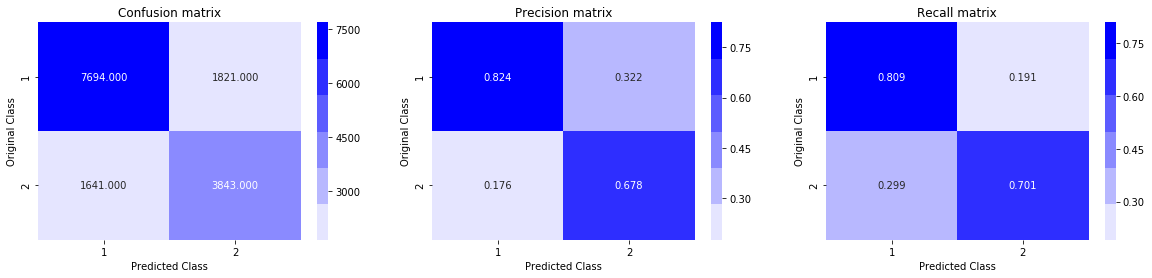

In [278]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
print(predicted_y)
plot_confusion_matrix(y_test, predicted_y)

<h3>Observations:</h3>

 - Our logloss improved to 0.44, so we can conclude, these simple linear models are just underfitting.
 
 -  In the Precision matrix:
     - Precision is good for Non_duplicates questoins (1), we predicted 83% correct and for the duplicate questions (2), we predicted 65% correct .  
 -  In the Recall matrix:
     - Recall is good for Non_duplicates questoins (1), we predicted 78% correct and for the duplicate questions (2), we get 73%.so you can see recall for the        duplicate_questions is improved in xgboost model,it result to be a good logloss.
     - But our Logloss are still not close to zero, may be because we not tune the hyperparameter of the xgboost, this we'll do later
     

<h1> Assinment 20</h1>

<h2> 4.4 Logistic Regression with hyperparameter tuning     (Tf-idf Vectorizer) </h2>

For values of alpha =  1e-05 The log loss is: 0.4474434565839543
For values of alpha =  0.0001 The log loss is: 0.43968722160645335
For values of alpha =  0.001 The log loss is: 0.4778806986762298
For values of alpha =  0.01 The log loss is: 0.5357824681491506
For values of alpha =  1 The log loss is: 0.5609122508593775
For values of alpha =  5 The log loss is: 0.5657715370009103
For values of alpha =  10 The log loss is: 0.5666321481255555


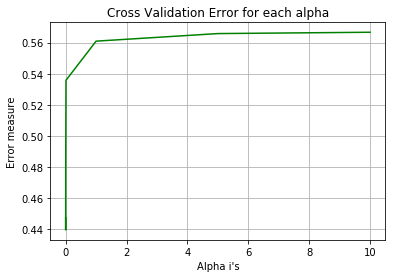

The Best Alpha  ->   0.0001


In [105]:
X_train=X_set1_train
X_test=X_set1_test

alpha =[10**-5,10**-4, 10**-3,10**-2,1,5,10]   # hyperparameter for the sgd classifier    


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42,class_weight='balanced')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    losls=log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
    log_error_array.append(losls)
    print('For values of alpha = ', i, "The log loss is:",losls)

    
# plot 
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
# for i, txt in enumerate(np.round(log_error_array,2)):
#     ax.annotate((alpha[i],np.round(txt,2)), (alpha[i],log_error_array[i]))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.grid()
plt.show()

print('The Best Alpha  ->  ', alpha[np.argmin(log_error_array)])

For values of best alpha =  0.0001 The train log loss is: 0.38576722105579225
For values of best alpha =  0.0001 The test log loss is: 0.43968722160645335


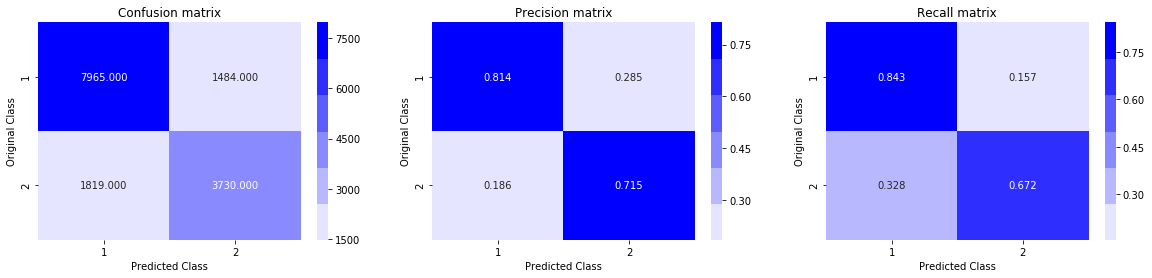

In [106]:

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42,class_weight='balanced')
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)# we have a rows of two columns
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.4 Linear SVM with hyperparameter tuning     (Tf-idf Vectorizer) </h2>

For values of alpha =  1e-05 The log loss is: 0.46757802659067454
For values of alpha =  0.0001 The log loss is: 0.45849310861472165
For values of alpha =  0.001 The log loss is: 0.5141963686474008
For values of alpha =  0.01 The log loss is: 0.5704646809762461
For values of alpha =  0.1 The log loss is: 0.6328283229900693
For values of alpha =  0.3 The log loss is: 0.6589464571130843
For values of alpha =  0.5 The log loss is: 0.6589464571130842
For values of alpha =  0.7 The log loss is: 0.6589464571130843
For values of alpha =  1 The log loss is: 0.6589464571130843
For values of alpha =  2 The log loss is: 0.6589464571130846


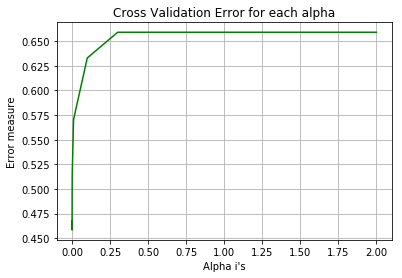

The Best Alpha  ->   0.0001


In [103]:
alpha =[10**-5,10**-4, 10**-3,10**-2,0.1,0.3,0.5,0.7,1,2]   # hyperparameter for the sgd classifier    


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42,class_weight='balanced')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    losls=log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
    log_error_array.append(losls)
    print('For values of alpha = ', i, "The log loss is:",losls)

    
# plot 
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
# for i, txt in enumerate(np.round(log_error_array,2)):
#     ax.annotate((alpha[i],np.round(txt,2)), (alpha[i],log_error_array[i]))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.grid()
plt.show()

print('The Best Alpha  ->  ', alpha[np.argmin(log_error_array)])

For values of best alpha =  0.0001 The train log loss is: 0.42550959638721464
For values of best alpha =  0.0001 The test log loss is: 0.45849310861472165


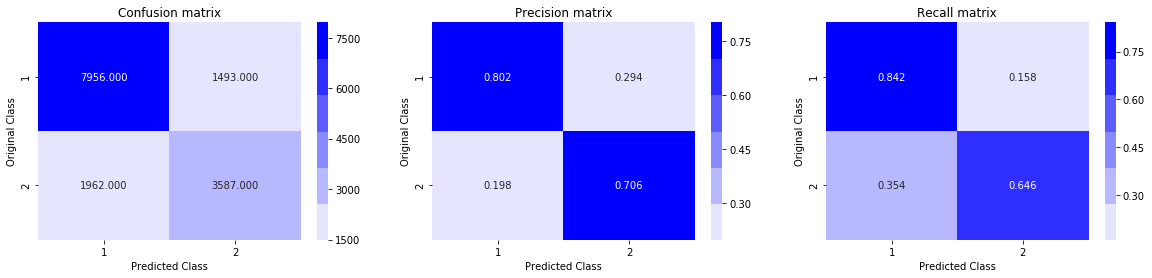

In [104]:

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42,class_weight='balanced')
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)# we have a rows of two columns
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.6 XGBoost (Hyper parameter tuning) </h2>

In [263]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
#params = {}
# tuned parameters={params['objective'] = 'binary:logistic'
# params['eval_metric'] = 'logloss'
# params['eta'] = 0.02
# params['max_depth'] = 4}

parameters = {'n_estimators': [5, 10, 50, 100,150, 200,250], 'max_depth':[2, 3, 4, 5,  7, 8,  10] } 
clf1 = RandomizedSearchCV(XGBClassifier(n_jobs=-1), parameters,scoring='neg_log_loss',verbose=2,cv=3,return_train_score=True)
clf1.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_estimators=100, max_depth=5 ...................................
[CV] .................... n_estimators=100, max_depth=5, total=   9.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.7s remaining:    0.0s


[CV] n_estimators=100, max_depth=5 ...................................
[CV] .................... n_estimators=100, max_depth=5, total=   9.8s
[CV] n_estimators=100, max_depth=5 ...................................
[CV] .................... n_estimators=100, max_depth=5, total=  12.3s
[CV] n_estimators=200, max_depth=5 ...................................
[CV] .................... n_estimators=200, max_depth=5, total=  26.2s
[CV] n_estimators=200, max_depth=5 ...................................
[CV] .................... n_estimators=200, max_depth=5, total=  26.7s
[CV] n_estimators=200, max_depth=5 ...................................
[CV] .................... n_estimators=200, max_depth=5, total=  26.3s
[CV] n_estimators=150, max_depth=4 ...................................
[CV] .................... n_estimators=150, max_depth=4, total=  16.4s
[CV] n_estimators=150, max_depth=4 ...................................
[CV] .................... n_estimators=150, max_depth=4, total=  16.3s
[CV] n

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  9.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [5, 10, 50, 100, 150, 200, 250], 'max_depth': [2, 3, 4, 5, 7, 8, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_log_loss', verbose=2)

In [ ]:
print(clf1.best_params_)

In [264]:
clf1 = XGBClassifier(n_jobs=-1, n_estimators=100,max_depth=10)
clf1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [279]:
predict_y = clf1.predict_proba(X_train)
print( "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = clf1.predict_proba(X_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

The train log loss is: 0.3069447471494545
The test log loss is: 0.4012282521100256


[[0.7501721  0.24982792]
 [0.8347993  0.1652007 ]
 [0.7362648  0.26373518]
 ...
 [0.995313   0.00468701]
 [0.39513725 0.60486275]
 [0.99674225 0.00325777]]
[0 0 0 ... 0 1 0]


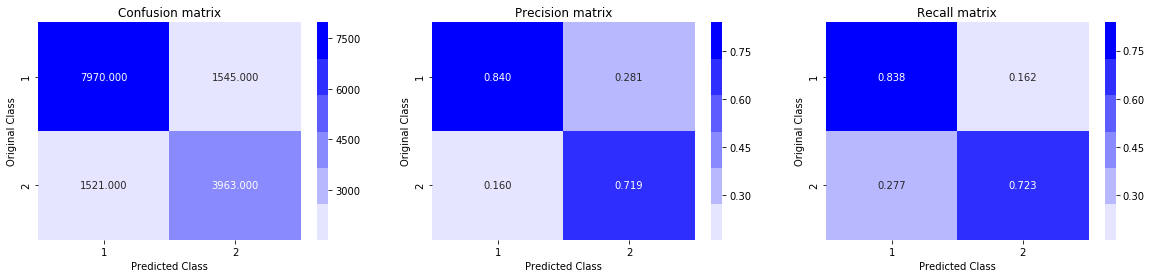

In [288]:
print(predict_y)
predicted_y =np.argmax(predict_y,axis=1)# we have a rows of two columns
print(predicted_y)
plot_confusion_matrix(y_test, predicted_y)

<h1> Conclusion  </h1>

In [113]:
from prettytable import PrettyTable
tb = PrettyTable()
tb.field_names= ("      Vectorizer", "                                        Model", "                                                               Log_loss") 
tb.add_row(["tf-idf_Weighted_word2vec", "            Logistic Regression",                                                                 0.62     ]) 
tb.add_row(["  Tf-idf_Weighted_word2vec", "            Linear SVM",                                                                            0.62     ])
tb.add_row(["     tf-idf_Weighted_word2vec", "             XGBOOST",                                                                            0.43    ]) 
tb.add_row(["      Tf-idf_vectorizer", "                                Logistic Regression",                                                             0.43       ])
tb.add_row(["         Tf-idf_vectorizer", "                                Linear SVM",                                                                         0.45        ])
tb.add_row(["           Tf-idf_vectorizer", "                                 XGBOOST with hyperparameter tunning",                          0.40        ])
print(tb.get_string(titles = "Quora Case Study - Observations")) #print(tb)

+-------------------------------+----------------------------------------------------------------------+-------------------------------------------------------------------------+
|              Vectorizer       |                                                    Model             |                                                                Log_loss |
+-------------------------------+----------------------------------------------------------------------+-------------------------------------------------------------------------+
|    tf-idf_Weighted_word2vec   |                               Logistic Regression                    |                                   0.62                                  |
|     Tf-idf_Weighted_word2vec  |                                    Linear SVM                        |                                   0.62                                  |
|      tf-idf_Weighted_word2vec |                                      XGBOOST                         | 

<h1> Step by Step Procedure: </h1>

 -  Firstly I  took 50k datapoints from train_data and did Data Visualisation of Quora duplicate and non_duplicate questions.
 -  I add some classical NLP features like word_common_shar,no_of_words, no_of_characters etc.
 -  I did Text Preprocessing and cleaning
 -  I add some complex NLP distance based features.
 -  I did Analysis of the Extracted features.
 -  I plot the TSNE with 15 advanced features which i got.
 -  I split the data and apply various featurizations like tfidf weighted word2vec and tf-idf vectorizer.
 -  I save all features into the files and then read the data from file and then store the data in sql database.
 -  I made the Baseline model
 -  I apply Logistic regression, Linear SVM and XGBOOST with  Tf-idf_Weighted_word2vec featurizer
 -  Last, I apply Logistic regression, Linear SVM and XGBOOST with  Tf-idf vectorizer



















